In [84]:
from eodhd import APIClient
import pandas as pd

In [2]:
api_key = "5cb671b0b4a790.35526238"
api = APIClient(api_key)

In [85]:
import json
with open('../industries.json', 'r') as json_file:
    all_industries = json.load(json_file)
sector = 'Basic Materials'
industry_list = all_industries[sector]

In [4]:
print(industry_list)

['Agricultural Chemicals', 'Agricultural Inputs', 'Aluminum', 'Building Materials', 'Chemicals', 'Chemicals - Major Diversified', 'Coal', 'Coking Coal', 'Copper', 'Gold', 'Independent Oil & Gas', 'Industrial Metals & Minerals', 'Lumber & Wood Production', 'Major Integrated Oil & Gas', 'Nonmetallic Mineral Mining', 'Oil & Gas Drilling & Exploration', 'Oil & Gas Equipment & Services', 'Oil & Gas Pipelines', 'Oil & Gas Refining & Marketing', 'Other Industrial Metals & Mining', 'Other Precious Metals & Mining', 'Paper & Paper Products', 'Silver', 'Specialty Chemicals', 'Steel', 'Steel & Iron', 'Synthetics']


In [5]:
limit = 100
offset = 0
all_data = []
from urllib.parse import urlencode
import requests
base_url = "https://eodhd.com/api/screener"

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NYSE"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NASDAQ"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit


print(len(all_data))
BMdf = pd.DataFrame(all_data)
print(BMdf)

{'data': []}
{'data': [{'code': 'CTA-PB', 'name': 'E. I. du Pont de Nemours and Company', 'last_day_data_date': '2024-06-14', 'adjusted_close': 70.185, 'refund_1d': -0.005, 'refund_1d_p': -0.01, 'refund_5d': -1.055, 'refund_5d_p': -1.48, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 60906962944, 'earnings_share': None, 'dividend_yield': 0.0638, 'sector': 'Basic Materials', 'industry': 'Agricultural Inputs', 'avgvol_1d': 685, 'avgvol_200d': 4006.31}, {'code': 'CTA-PA', 'name': 'E. I. du Pont de Nemours and Company', 'last_day_data_date': '2024-06-14', 'adjusted_close': 55.495, 'refund_1d': -0.825, 'refund_1d_p': -1.46, 'refund_5d': 0.185, 'refund_5d_p': 0.33, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 48158892032, 'earnings_share': None, 'dividend_yield': 0.0627, 'sector': 'Basic Materials', 'industry': 'Agricultural Inputs', 'avgvol_1d': 602, 'avgvol_200d': 1072.55}, {'code': 'CTVA', 'name': 'Corteva Inc', 'last_day_data_date': '2024-06-14',

In [6]:
financial_list = []
for i in range(BMdf.size):
    try:
        code = BMdf.loc[i]['code']
        financial = api.get_fundamentals_data(code)
        print(code)
        if financial:
            financial_list.append(financial)
    except Exception as e:
        print(f'error data for {code} : {e}')

CTA-PB
CTA-PA
CTVA
NTR
CF
MOS
FMC
ICL
SMG
UAN
IPI
AVD
CGA
BHIL
AA
CSTM
CRH
MLM
VMC
JHX
CX
EXP
SUM
BCC
KNF
TGLS
LOMA
CPAC
DOW
CE
HUN
TROX
BAK
REX
WLKP
ASIX
LXU
VHI
RYAM
AMR
HCC
ARCH
SXC
SCCO
FCX
HBM
ERO
IE
MTAL
TGB
NEM
AEM
GOLD
WPM
FNV
GFI
AU
KGC
PAAS
AGI
HMY
BTG
EGO
OR
CDE
IAG
EQX
SAND
NGD
FSM
CGAU
SA
ORLA
NG
DRD
NFGC
GAU
IAUX
GROY
DC
CTGO
CMCL
ODV
GLDG
IDR
TRX
THM
VGZ
GORO
PZG
AUST
ARMN
PDO
SSD
WFG
EVA
SLB
HAL
TS
FTI
NOV
VAL
TDW
LBRT
WHD
AESI
AROC
USAC
XPRO
KGS
OII
HLX
RES
SLCA
MRC
VTOL
PUMP
CLB
NR
DRQ
EFXT
NOA
TTI
SOI
OIS
NGS
RNGR
FET
FTK
NINE
SDPI
ENSV
MPC
PSX
VLO
DINO
SUN
VVV
PBF
UGP
CSAN
CVI
DKL
DK
WKC
PARR
CAPL
SGU
AE
BHP
RIO
VALE
TECK
MP
MTRN
NEXA
LZM
LAC
CMP
SKE
VZLA
SLI
WRN
NMG
EMX
NAK
TMQ
USAS
XPL
FURY
UAMY
WWR
GRFX
LAAC
BVN
HL
SBSW
TFPM
SILV
HL-PB
EXK
GATO
MUX
NEWP
MTA
PLG
ASM
ITRG
LODE
AUMN
SUZ
SLVM
CLW
GLT
ITP
AG
MAG
SVM
SHW
ECL
APD
DD
LYB
PPG
IFF
WLK
AVTR
RPM
SQM
ALB
EMN
AXTA
ESI
OLN
CBT
NEU
ASH
SSL
FUL
ALTM
AVNT
CC
SXT
KWR
MTX
SCL
NGVT
KRO
OEC
WTTR
PRM
ECVT
MATV
KOP
ODC


In [7]:
def get_price(code):
    date = '2024-03-28'
    price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date=date, to_date=date)
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-01', to_date='2024-04-01')
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-02', to_date='2024-04-02')
    return price

In [8]:
def get_debt(stock):
    debt1 = None
    debt2 = None
    report = stock['Financials']['Balance_Sheet']['quarterly']
    for key in report:
        debt1 = report[key].get('longTermDebtTotal')
        debt2 = report[key].get('longTermDebt')
        if debt1 and debt2:
            return float(max(debt1, debt2))
        if debt1:
            return float(debt1)
        if debt2:
            return float(debt2)

In [9]:
def get_ebitda(stock):
    ebitda = None
    sum = 0
    cout = 0
    report = stock['Financials']['Income_Statement']['quarterly']
    for key in report:
        ebitda = report[key].get('ebitda')
        if ebitda:
            sum = sum + float(ebitda)
            cout = cout + 1
            if cout == 4:
                return sum


In [10]:
def get_shares(stock):
    share = float(stock['SharesStats']['SharesOutstanding'])
    return share
def get_FCF(stock):
    report = stock['Financials']['Cash_Flow']['quarterly']
    sum = 0
    cout = 0
    for key in report:
        FCF = report[key].get('freeCashFlow')
        if FCF:
            cout = cout + 1
            sum = sum + float(FCF)
            if cout == 4 :
                return sum

In [11]:
def get_EPS(stock):
    earningHistory = stock['Earnings']['History']
    cout = 0
    sum = 0
    for key in earningHistory:
        EPS = earningHistory[key]['epsActual']
        if EPS is not None:
            cout = cout + 1
            sum = sum + float(EPS)
            if cout == 4:
                return sum

In [12]:
def get_dividend(stock):
    sum = 0
    cout = 0
    report = stock['Financials']['Cash_Flow']['quarterly']
    for key in report:
        div = report[key].get('dividendsPaid')
        if div:
            sum = sum + abs(float(div))
            cout = cout + 1
            if cout == 4:
                return sum

In [92]:
Codelist = []
Debtlist = []
divYlist = []
FCFlist = []
EPSlist = []
lack_finan_cout = 0
price_cout = 0
FCF_cout = 0
Dividend_cout = 0
EPS_cout = 0
EBITDA_cout = 0
Debt_cout = 0
Shares_cout = 0
for stock in financial_list:
    code = stock['General']['Code']
    try:
        price_data = get_price(code)
        price = float(price_data[0]['adjusted_close'])
    except Exception as e:
        print(f"{code} price error: {e}")
        price_cout += 1
        continue
    try:
        financial = stock['Financials']
    except Exception as e:
        print(f"{code} no Financial data provided: {e}")
        lack_finan_cout += 1
        continue

    try:
        debt_o = get_debt(stock)
        if debt_o == 0 or not debt_o:
            print(f"{code} has no debt data in database")
            Debt_cout += 1
            continue
    except Exception as e:
        print(f"{code} debt: {e}")
        Debt_cout += 1
        continue
    try:
        ebitda = get_ebitda(stock)
        if not ebitda or ebitda == 0:
            print(f"{code} EBITDA Zero error")
            EBITDA_cout += 1
            continue
    except Exception as e:
        print(f"{code} EBITDA error: {e}")
        EBITDA_cout += 1
        continue
    try:
        FCF = get_FCF(stock)
        if not FCF or FCF == 0:
            print(f"{code} Couldn't get FCF error")
            FCF_cout += 1
            continue
    except Exception as e:
        print(f"{code} FCF error: {e}")
        FCF_cout += 1
        continue
    try:
        share = get_shares(stock)
    except Exception as e:
        print(f"{code} Share doesn't exist error: {e}")
        Shares_cout += 1
        continue
    try:
        #Calculate FCF Yield
        FCF_Y = FCF/share/price
    except Exception as e:
        print(f"{code} Share probably zero: {e}")
        Shares_cout += 1
        continue
    try:
        EPS = get_EPS(stock)
        if not EPS or EPS == 0:
            print(f"{code} EPS Zero error")
            EPS_cout += 1
            continue
    except Exception as e:
        print(f"{code} EPS error: {e}")
        EPS_cout += 1
        continue
    try:
        #Calculate Debt ratio
        debt = debt_o/ebitda
    except Exception as e:
        print(f"{code} EBITDA zero: {e}")
        EBITDA_cout += 1
        continue
    try:
        #Calculate EPS per 
        EPSPS = EPS/price
    except Exception as e:
        print(f"{code} Earning all zero or none: {e}")
        EPS_cout += 1
        continue
    try:
        dividend = get_dividend(stock)
        if not dividend or dividend == 0:
            print(f'{code} has no Dividend Paid')
            Dividend_cout += 1
            continue
        dividendY = dividend / share / price
    except Exception as e:
        print(f"{code} div calculation error: {e}")
        price_cout += 1
        continue
    FCFlist.append(FCF_Y)
    Codelist.append(code)
    Debtlist.append(debt)
    EPSlist.append(EPSPS)
    divYlist.append(dividendY)


CTA-PB EPS Zero error
CTA-PA EPS Zero error
CGA has no Dividend Paid
BHIL has no Dividend Paid
CSTM has no Dividend Paid
KNF has no Dividend Paid
REX has no debt data in database
RYAM has no Dividend Paid
ERO has no Dividend Paid
IE has no Dividend Paid
MTAL has no debt data in database
HMY EPS Zero error
CDE has no Dividend Paid
EQX has no Dividend Paid
NGD has no Dividend Paid
FSM has no Dividend Paid
SA has no Dividend Paid
ORLA has no Dividend Paid
NG has no Dividend Paid
DRD EPS Zero error
NFGC has no debt data in database
GAU has no Dividend Paid
IAUX has no Dividend Paid
DC has no debt data in database
ODV has no Dividend Paid
IDR has no Dividend Paid
TRX has no Dividend Paid
THM has no debt data in database
VGZ has no debt data in database
GORO has no Dividend Paid
PZG has no Dividend Paid
AUST has no debt data in database
PDO has no debt data in database
PUMP has no Dividend Paid
DRQ has no debt data in database
OIS has no Dividend Paid
NGS has no Dividend Paid
ENSV has no Div

In [93]:
print(f"Stocks with no Financial data provided:{lack_finan_cout}")
print(f"Stocks lack EPS data or EPS zero:{EPS_cout}")
print(f"Stocks lack price data:{price_cout}")
print(f"Stocks lack Debt data or Debt zero:{Debt_cout}")
print(f"Stocks lack shares data or shares zero:{Shares_cout}")
print(f"Stocks lack EBITDA data or EBITDA zero:{EBITDA_cout}")
print(f"Stocks pay zero dividend:{Dividend_cout}")
print(f"Stocks lack FCF data or FCF zero:{FCF_cout}")
print(f"total numer check {len(Codelist) + lack_finan_cout + price_cout + FCF_cout+ Debt_cout + EPS_cout + EBITDA_cout + Dividend_cout + Shares_cout}")

Stocks with no Financial data provided:0
Stocks lack EPS data or EPS zero:8
Stocks lack price data:0
Stocks lack Debt data or Debt zero:35
Stocks lack shares data or shares zero:7
Stocks lack EBITDA data or EBITDA zero:2
Stocks pay zero dividend:75
Stocks lack FCF data or FCF zero:1
total numer check 353


In [94]:
print(len(Codelist))
print(len(Debtlist))
print(len(divYlist))
print(len(FCFlist))
print(len(EPSlist))

225
225
225
225
225


In [15]:
df = pd.DataFrame({
    'Code': Codelist,
    'Debt': Debtlist,
    'Dividend Yield': divYlist,
    'EPS Yield': EPSlist,
    'FCF' :  FCFlist
})

datafile_name = f'{sector}.csv'
df.to_csv(datafile_name, index=False)

In [16]:
df = pd.read_csv('Basic Materials.csv')

In [69]:
import pandas as pd
top_50s = []
worst_100s = []
positive_df = df[df['Debt'] > 0]

top_50s.append(positive_df.nsmallest(75,'Debt'))
top_50s.append(positive_df.nlargest(75,'Dividend Yield'))
top_50s.append(positive_df.nlargest(75,'EPS Yield'))
top_50s.append(positive_df.nlargest(75,'FCF'))
worst_100s.append(positive_df.nlargest(120, 'Debt'))
worst_100s.append(positive_df.nsmallest(120, 'Dividend Yield'))
worst_100s.append(positive_df.nsmallest(120, 'EPS Yield'))
worst_100s.append(positive_df.nsmallest(120, 'FCF'))

combined_top_50 = pd.concat(top_50s).drop_duplicates().reset_index(drop=True)
combined_worst_100 = pd.concat(worst_100s).drop_duplicates().reset_index(drop=True)
worst_codes = combined_worst_100['Code'].unique()

final_selection = combined_top_50[~combined_top_50['Code'].isin(worst_codes)]

In [70]:
print(final_selection.shape)
print(final_selection)

(18, 5)
    Code       Debt  Dividend Yield  EPS Yield        FCF
6     TS 0.00623172      0.03859765 0.15661238 0.17095201
7    BTG 0.00644301      0.05655786 0.09724221 0.13084319
21  ARCH 0.20333789      0.06319650 0.10642307 0.15397057
22    MT 0.21866643      0.02540229 0.20648827 0.08251288
28  CGAU 0.35151364      0.03566214 0.07327755 0.27659314
29   SOI 0.35666730      0.06580272 0.08773777 0.15862111
30  WTTR 0.36407414      0.02782907 0.07088873 0.20576413
31    TX 0.36881880      0.07351656 0.21582679 0.10053238
34  METC 0.43334824      0.03872760 0.08696122 0.11757160
37  SSRM 0.46898505      0.04795404 0.29372197 0.27512602
40   BCC 0.55228730      0.05779574 0.08031520 0.07396859
48  VALE 0.71255704      0.14344206 0.14848236 0.13000397
53   GGB 0.86022765      0.33054808 0.72405914 0.46329158
54   VLO 0.90715318      0.02577964 0.11951611 0.11390666
56  WLKP 0.91031960      0.08678397 0.07088118 0.48049911
63  DINO 1.01782320      0.03061971 0.13769432 0.17948198
68   S

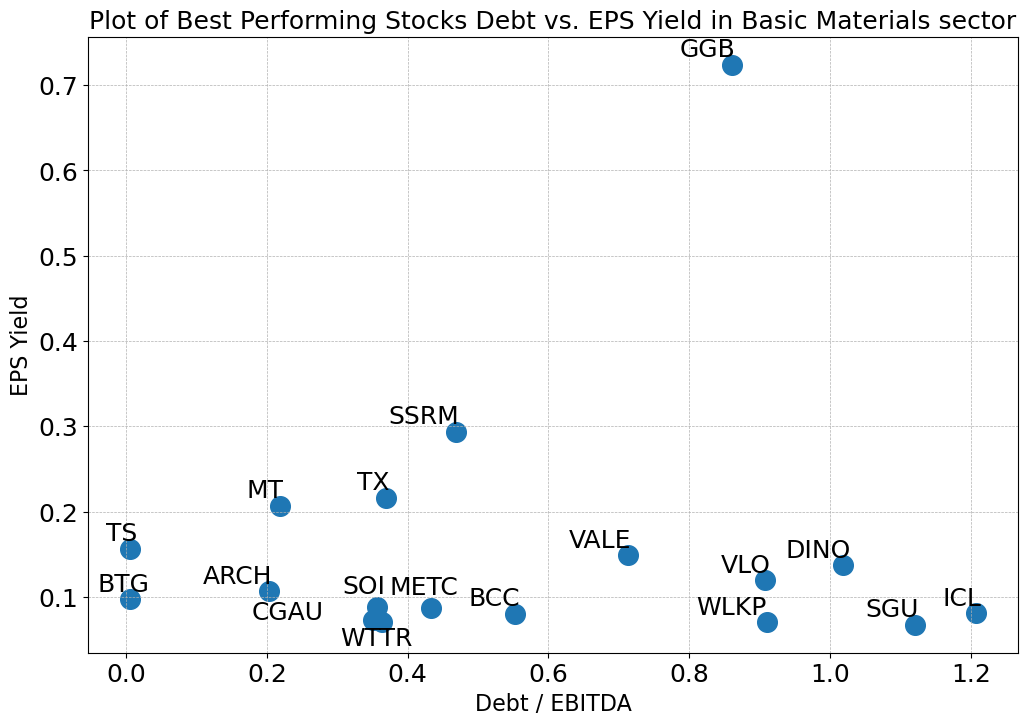

In [90]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('EPS Yield',fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)
scatter = plt.scatter(final_selection['Debt'], final_selection['EPS Yield'], s = 200) 

texts = []
for i, row in final_selection.iterrows():
    texts.append(plt.text(row['Debt'], row['EPS Yield'], row['Code'], fontsize=18, ha='right'))

adjust_text(texts)
sector_title = f'{sector} sector'
plt.title('Plot of Best Performing Stocks Debt vs. EPS Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_EPS_fixed.png', bbox_inches='tight')
plt.show()

In [95]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('Dividend Yield',fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

plot_data = final_selection[final_selection['Code'] != 'AMTD']
scatter = plt.scatter(plot_data['Debt'], plot_data['Dividend Yield'], c='r',s=200) 

texts = []
for i, row in plot_data.iterrows():
    texts.append(plt.text(row['Debt'], row['Dividend Yield'], row['Code'], fontsize=18, ha='right'))
adjust_text(texts)

plt.title('Plot of Best Performing Stocks Debt vs. Dividend Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_Div_fixed.png', bbox_inches='tight')
plt.show()

In [88]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('FCF Yield',fontsize=16)
scatter = plt.scatter(plot_data['Debt'], plot_data['FCF'], c='g',s=200) 
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

texts = []
for i, row in plot_data.iterrows():
    texts.append(plt.text(row['Debt'], row['FCF'], row['Code'], fontsize=18, ha='right'))
adjust_text(texts)


plt.title('Plot of Best Performing Stocks Debt vs. FCF Yield in ' + sector_title , fontsize=18)
plt.savefig('Best_Debt_FCF_fixed.png', bbox_inches='tight')
plt.show()

In [74]:
today = '2024-06-03'
days_60 = '2024-04-04'
days_120 = '2024-02-05'
days_year = '2023-06-05'
def get_returns(stock,date,index='.US'):
    code = stock['General']['Code']
    price = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=date, to_date=date)[0]['adjusted_close'])
    price_today = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=today, to_date=today)[0]['adjusted_close'])
    returns = (price_today - price) / price
    return returns

In [75]:
def get_all_returns(stock,index='.US'):
    stock_returns = []
    stock_returns.append(get_returns(stock, days_60, index))
    stock_returns.append(get_returns(stock, days_120, index))
    stock_returns.append(get_returns(stock, days_year,index))
    return stock_returns

In [76]:
stocks_Best = []
for index, row in final_selection.iterrows():
    code = row['Code']
    print(code)
    stock = api.get_fundamentals_data(code)
    stocks_Best.append(stock)


TS
BTG
ARCH
MT
CGAU
SOI
WTTR
TX
METC
SSRM
BCC
VALE
GGB
VLO
WLKP
DINO
SGU
ICL


In [77]:
all_returns = []
for stock in stocks_Best:
    all_returns.append(get_all_returns(stock))


In [78]:
GSPC_returns = []

price_60 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_60, to_date=days_60)[0]['adjusted_close'])
price_today = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=today, to_date=today)[0]['adjusted_close'])
price_120 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_120, to_date=days_120)[0]['adjusted_close'])
price_year = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_year, to_date=days_year)[0]['adjusted_close'])
GSPC_returns.append((price_today - price_60) / price_60)
GSPC_returns.append((price_today - price_120) / price_120)
GSPC_returns.append((price_today - price_year) / price_year)
print(GSPC_returns)

[0.026458974862109824, 0.0689061066699691, 0.2362329220668307]


In [79]:
all_returns.append(GSPC_returns)

In [80]:
code_list = []
for stock in stocks_Best:
    code_list.append(stock['General']['Code'])
code_list.append('GSPC')

In [81]:
df_returns = pd.DataFrame(all_returns, columns=['60 Days', '120 Days', '1 Year'])
df_returns.insert(0, 'Code', code_list)
filename = f'returns_{sector}.csv'
df_returns.to_csv(filename, index=False)

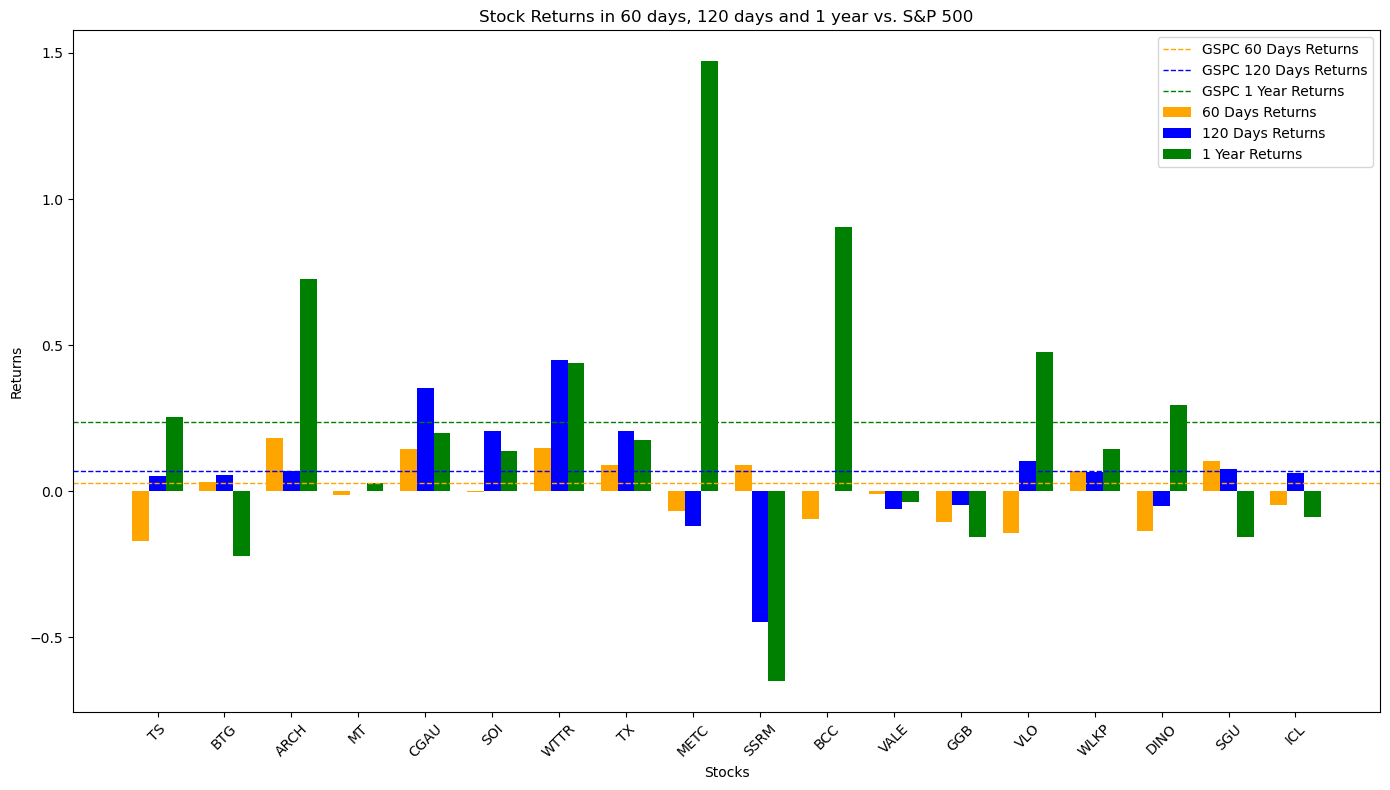

In [82]:
import numpy as np
import matplotlib.pyplot  as plt

plot_data = df_returns.iloc[:-1]

bar_width = 0.25  
index = np.arange(len(plot_data['Code'])) 

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(index - bar_width, plot_data['60 Days'], bar_width, label='60 Days Returns', color = 'orange')
rects2 = ax.bar(index, plot_data['120 Days'], bar_width, label='120 Days Returns', color = 'blue')
rects3 = ax.bar(index + bar_width, plot_data['1 Year'], bar_width, label='1 Year Returns', color = 'green')

ax.axhline(y=GSPC_returns[0], color='orange', linestyle='--', linewidth=1, label='GSPC 60 Days Returns')
ax.axhline(y=GSPC_returns[1], color='blue', linestyle='--', linewidth=1, label='GSPC 120 Days Returns')
ax.axhline(y=GSPC_returns[2], color='green', linestyle='--', linewidth=1, label='GSPC 1 Year Returns')

ax.set_xlabel('Stocks')
ax.set_ylabel('Returns')
ax.set_title('Stock Returns in 60 days, 120 days and 1 year vs. S&P 500')
ax.set_xticks(index)
ax.set_xticklabels(plot_data['Code'], rotation=45) 
ax.legend() 

plt.tight_layout() 
plt.savefig('Returns.png')
plt.show()

In [83]:
benefit_60_days = np.sum(plot_data['60 Days'])/20
benefit_120_days = np.sum(plot_data['120 Days'])/20
benefit_1_year = np.sum(plot_data['1 Year'])/20
benefit_GPSC_60 = GSPC_returns[0]
benefit_GPSC_120 = GSPC_returns[1]
benefit_GPSC_1_Y = GSPC_returns[2]
print(f"Return for Investing in Best-Stocks Portfolios in 60 days is {benefit_60_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 60 days is {benefit_GPSC_60 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 120 days is {benefit_120_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 120 days is {benefit_GPSC_120 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 1 year is {benefit_1_year * 100:.2f}%")
print(f"Return for Investing in S&P500 in 1 year is {benefit_GPSC_1_Y * 100:.2f}%")

Return for Investing in Best-Stocks Portfolios in 60 days is 0.34%
Return for Investing in S&P500 in 60 days is 2.65%
Return for Investing in Best-Stocks Portfolios in 120 days is 4.94%
Return for Investing in S&P500 in 120 days is 6.89%
Return for Investing in Best-Stocks Portfolios in 1 year is 19.70%
Return for Investing in S&P500 in 1 year is 23.62%
